<a href="https://colab.research.google.com/github/AsthmaticDonkey/Thesis/blob/master/ORBTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pip install pydicom

In [0]:
def convert_ybr_to_rgb(arr):
    if len(arr.shape) == 4:
        return np.vstack([convert_ybr_to_rgb(a)[np.newaxis] for a in arr])
    else:
        temp = arr[..., 1].copy()
        arr[..., 1] = arr[..., 2]
        arr[..., 2] = temp
        return cv2.cvtColor(arr, cv2.COLOR_YCR_CB2RGB)


def get_pixel_array_rgb(ds):
    if ds.PhotometricInterpretation in ['YBR_FULL', 'YBR_FULL_422']:
        return convert_ybr_to_rgb(ds.pixel_array)
    print("Unable to convert")
    return ds.pixel_array

In [0]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [0]:
import numpy as np
from matplotlib import pyplot as plt, cm
from __future__ import division
import pydicom as DCM
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, cm
import numpy as np
import os
import nibabel as nib
import matplotlib.image as mpimg
import matplotlib.colors as mcol
%matplotlib inline

In [0]:
dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')

img= dicom_image_file_0.pixel_array[350]


/usr/local/lib/python3.6/dist-packages/pydicom/filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


In [0]:
A = np.double(img)
out = np.zeros(A.shape, np.double)
normalized = cv2.normalize(A, out, 1.0, 0.0, cv2.NORM_MINMAX)

In [0]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(out, None)


error: ignored

In [0]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Number of Keypoints Detected In The Training Image:  445
Number of Keypoints Detected In The Query Image:  127


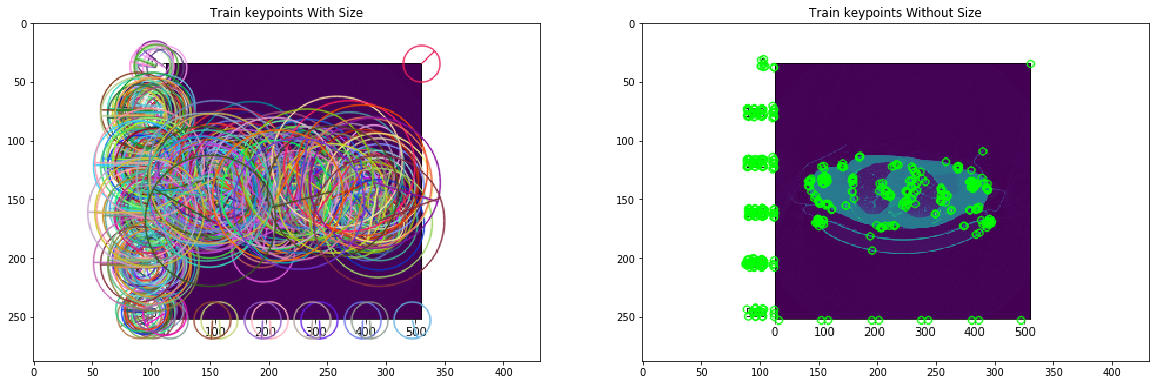

In [0]:
m = []
for inum in range(0, dicom_image_file_0.pixel_array.shape[0]):
  img1= dimg[inum]
  # Create test image by adding Scale Invariance and Rotational Invariance
  test_image = cv2.pyrDown(img1)
  #test_image = cv2.pyrDown(test_image)
  num_rows, num_cols = test_image.shape[:2]

  test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

  plt.imshow(test_image)



  orb = cv2.ORB_create()

  train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
  test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

  keypoints_without_size = np.copy(training_image)
  keypoints_with_size = np.copy(training_image)

  cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

  cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  # Display image with and without keypoints size
  fx, plots = plt.subplots(1, 2, figsize=(20,10))

  plots[0].set_title("Train keypoints With Size")
  plots[0].imshow(keypoints_with_size, cmap='gray')

  plots[1].set_title("Train keypoints Without Size")
  plots[1].imshow(keypoints_without_size, cmap='gray')

  # Print the number of keypoints detected in the training image
  print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

  # Print the number of keypoints detected in the query image
  print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

  # Create a Brute Force Matcher object.
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

  # Perform the matching between the ORB descriptors of the training image and the test image
  matches = bf.match(train_descriptor, test_descriptor)

  # The matches with shorter distance are the ones we want.
  matches = sorted(matches, key = lambda x : x.distance)

  result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

  # Display the best matching points
  plt.rcParams['figure.figsize'] = [14.0, 7.0]
  plt.title('Best Matching Points')
  plt.imshow(result)
  plt.show()

  # Print total number of matching points between the training and query images
  print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

  m.append([inum, matches])



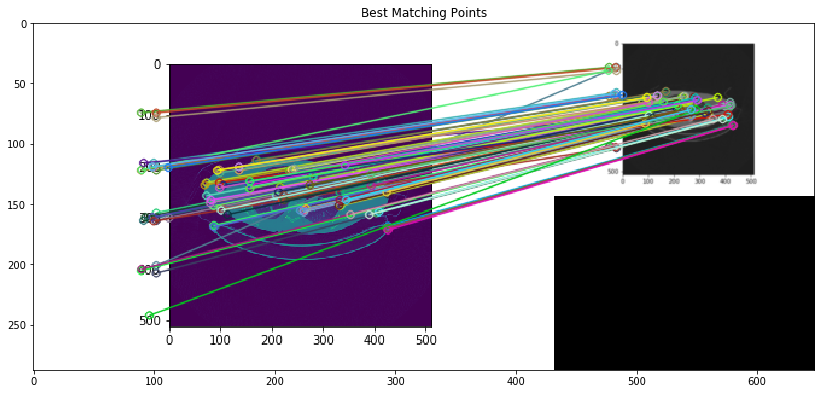


Number of Matching Keypoints Between The Training and Query Images:  94
